<a href="https://colab.research.google.com/github/gabrielyap/github-workshop/blob/master/Pokemon_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Preface***

In this project, I wanted to study how a video game series can change over the span of a few years. A common way video games change in order to attract both old and new players is by introducing more powerful elements into their game. The logic is that if something new and more powerful is  implemented, older players would be excited to play so that they can experience the game on a new level. This idea is called a "power creep", where a game will slowly have more powerful entities in comparison to itself when the game first came out.

In the video game series, Pokemon, the player catches "Pokemon" which all possess a unique set of stats, like attack, speed, and defense. The higher any of these stats are, the more powerful a pokemon is. More stats equals more power. A new set of pokemon are released in each new game, called "generations". The first pokemon that came out are called Generation I, and in the second game are called Generation II. This data set goes up to Generation VI.

I want to answer the question: is there a correlation between the total amount of stats a pokemon has and the generation that pokemon was introduced in? If so, how can we predict what stats the next generation will have? Finally, can we prove that pokemon is practicing "power creep"?


---




***Research***

First I import the dataset of all pokemon and their stats from Generation I-VI (provided by Alberto Barradas on kaggle.com)





In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

PKMN_DIR = '/content/Pokemon.csv'
pkmn_data = pd.read_csv(PKMN_DIR)
print (pkmn_data)


       #                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]


**Calculate the average total stats for each individual generation.**

In [ ]:
avg_stats_total_gen1 = pkmn_data[pkmn_data['Generation'] == 1]['Total'].mean()
print("Average total stats of Gen I: ", avg_stats_total_gen1)

avg_stats_total_gen2 = pkmn_data[pkmn_data['Generation'] == 2]['Total'].mean()
print("Average total stats of Gen II: ", avg_stats_total_gen2)

avg_stats_total_gen3 = pkmn_data[pkmn_data['Generation'] == 3]['Total'].mean()
print("Average total stats of Gen III: ", avg_stats_total_gen3)

avg_stats_total_gen4 = pkmn_data[pkmn_data['Generation'] == 4]['Total'].mean()
print("Average total stats of Gen IV: ", avg_stats_total_gen4)

avg_stats_total_gen5 = pkmn_data[pkmn_data['Generation'] == 5]['Total'].mean()
print("Average total stats of Gen V: ", avg_stats_total_gen5)

avg_stats_total_gen6 = pkmn_data[pkmn_data['Generation'] == 6]['Total'].mean()
print("Average total stats of Gen VI: ", avg_stats_total_gen6)

Average total stats of Gen I:  426.81325301204816
Average total stats of Gen II:  418.2830188679245
Average total stats of Gen III:  436.225
Average total stats of Gen IV:  459.0165289256198
Average total stats of Gen V:  434.9878787878788
Average total stats of Gen VI:  436.3780487804878


**Plot the information on a graph. Generation vs Total Stats**



Predicted average total stats in x generation =  [3.44943107] x +  [423.21094598]


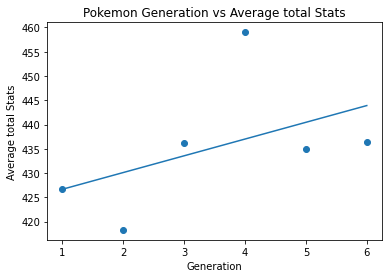

In [ ]:
ax = plt.gca()
#ax.scatter([1, 2, 3, 4, 5, 6], [[avg_stats_total_gen1], [avg_stats_total_gen2], [avg_stats_total_gen3], [avg_stats_total_gen4], [avg_stats_total_gen5], [avg_stats_total_gen6]], color ='b')
genArray = [1,2,3,4,5,6]
avgStatsArray = [[avg_stats_total_gen1], [avg_stats_total_gen2], [avg_stats_total_gen3], [avg_stats_total_gen4], [avg_stats_total_gen5], [avg_stats_total_gen6]]
ax.scatter(genArray, avgStatsArray)
plt.title('Pokemon Generation vs Average total Stats')
plt.xlabel('Generation')
plt.ylabel('Average total Stats')
m, b = np.polyfit(genArray, avgStatsArray, 1)
plt.plot(genArray, m*genArray + b)
print("Predicted average total stats in x generation = ", m, "x + ",b)

We can see that most generations follow the general trendline, but Generation II is significantly below the trendline while Generation IV is extremely above the general trendline. 

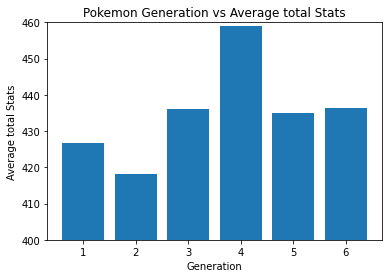

In [ ]:
avgStatsNoArr = [avg_stats_total_gen1, avg_stats_total_gen2, avg_stats_total_gen3, avg_stats_total_gen4, avg_stats_total_gen5, avg_stats_total_gen6]
ax = plt.gca()
ax.set_ylim(400,460)
plt.bar(genArray,avgStatsNoArr)
plt.title('Pokemon Generation vs Average total Stats')
plt.xlabel('Generation')
plt.ylabel('Average total Stats')
plt.show()


Important things to note is that Generation III was the first Pokemon game to come out on the Gameboy Advance, while I and II were released on the Gameboy Color, the older Gameboy. In addition, Generation IV was the first Pokemon game released on the Nintendo DS. 

I hypothesize that the reason why Generation III and IV were so high above the average compared to their older counterparts was to generate excitement for the players.


***Statistical Analysis***

Note: I am taking the average of the TOTAL average stats for each generation. I am not taking the average of all 721 recorded pokemon. This greatly reduces the standard deviation.

In [ ]:
# avg_stats_all = pkmn_data['Total']
# avg_stats_all = np.asarray(avg_stats_all).reshape(-1,1)
# print("Mean stats total of all pokemon Gen I-VI: ", np.mean(avg_stats_all))
# print("Standard deviation of all pokemon Gen I-VI:", np.std(avg_stats_all))
print("Mean stats total of all pokemon Gen I-VI: ", np.mean(avgStatsArray))
print("Standard deviation of all pokemon Gen I-VI:", np.std(avgStatsArray))

Mean stats total of all pokemon Gen I-VI:  435.2839547289932
Standard deviation of all pokemon Gen I-VI: 12.424370907524995


In [ ]:
print("Gen I z-score: ", (avg_stats_total_gen1 - np.mean(avgStatsArray)) / np.std(avgStatsArray))
print("Gen II z-score: ", (avg_stats_total_gen2 - np.mean(avgStatsArray)) / np.std(avgStatsArray))

Gen I z-score:  -0.6817811364448746
Gen II z-score:  -1.3683538577210237


This means that the average stats of Generation I pokemon are lower than 75.17% of the average stats of pokemon from Generation I-VI. Similarly, the average stats of Generation II pokemon is lower than 91.31% of all the average stats of pokemon from Generation I-VI.


**Conclusion**

There is compelling evidence that Pokemon experienced a "power creep" after the release of Generation III. The average total stats between all generations is about 435. Generation I started fairly low with an average total stats of 426. Generation II had a clear drop in average stats with a score of 418. Afterwards, Generation III surged the average stats back up, the following generations all had average total stats of 435 and above. 

It may be unclear as to why Pokemon decided to keep the average stats higher than those of Generation I and II, but the release of new technologies can serve as a prediction. In order to sell the most amount of games and gaming devices possible, new, more powerful additions in the Pokemon universe had to be created to keep purchases high. After all, everyone wants to be better, faster, and stronger.